## Importing all required libraries for Project

In [31]:
import pandas as pd
import numpy as np
import pgeocode

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

# change inline to auto if you have Spyder installed
%matplotlib inline

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Zip code vs population data -  https://worldpopulationreview.com/zips/illinois

In [32]:
df_pop = pd.read_csv('csvData.csv')

In [33]:
df_pop.head(10)

,zip,city,county,pop
0,60629,Chicago,Cook,110029
1,60618,Chicago,Cook,94907
2,60632,Chicago,Cook,89857
3,60639,Chicago,Cook,88204
4,60647,Chicago,Cook,87633
5,60617,Chicago,Cook,83553
6,60804,Cicero,Cook,82383
7,60623,Chicago,Cook,81283
8,60608,Chicago,Cook,80059
9,60625,Chicago,Cook,79444


## Get latitude and longitude from zip code -  https://simplemaps.com/data/us-zips

In [47]:
df_zip = pd.read_csv('uszips.csv')
df_zip.head(10)

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18005,-66.75218,Adjuntas,PR,Puerto Rico,True,NaN,17113.0,102.7,72001,Adjuntas,"{""72001"": ""99.43"", ""72141"": ""0.57""}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36074,-67.17519,Aguada,PR,Puerto Rico,True,NaN,37751.0,476.0,72003,Aguada,"{""72003"": ""100""}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45440,-67.12201,Aguadilla,PR,Puerto Rico,True,NaN,47081.0,574.9,72005,Aguadilla,"{""72005"": ""100""}",Aguadilla,72005,False,False,America/Puerto_Rico
3,606,18.16721,-66.93828,Maricao,PR,Puerto Rico,True,NaN,6392.0,58.3,72093,Maricao,"{""72093"": ""94.88"", ""72153"": ""3.78"", ""72121"": ""...",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29032,-67.12244,Anasco,PR,Puerto Rico,True,NaN,26686.0,286.9,72011,Añasco,"{""72011"": ""99.45"", ""72003"": ""0.55""}",Añasco|Aguada,72011|72003,False,False,America/Puerto_Rico
5,612,18.40699,-66.70805,Arecibo,PR,Puerto Rico,True,NaN,59369.0,339.1,72013,Arecibo,"{""72013"": ""99.89"", ""72017"": ""0.11""}",Arecibo|Barceloneta,72013|72017,False,False,America/Puerto_Rico
6,616,18.41752,-66.66814,Bajadero,PR,Puerto Rico,True,NaN,10022.0,335.6,72013,Arecibo,"{""72013"": ""100""}",Arecibo,72013,False,False,America/Puerto_Rico
7,617,18.44125,-66.55916,Barceloneta,PR,Puerto Rico,True,NaN,23750.0,603.5,72017,Barceloneta,"{""72017"": ""99.43"", ""72054"": ""0.57""}",Barceloneta|Florida,72017|72054,False,False,America/Puerto_Rico
8,622,17.99174,-67.15248,Boqueron,PR,Puerto Rico,True,NaN,6741.0,89.8,72023,Cabo Rojo,"{""72023"": ""100""}",Cabo Rojo,72023,False,False,America/Puerto_Rico
9,623,18.08354,-67.15418,Cabo Rojo,PR,Puerto Rico,True,NaN,41746.0,424.5,72023,Cabo Rojo,"{""72023"": ""100""}",Cabo Rojo,72023,False,False,America/Puerto_Rico


## Join 2 data frame

In [48]:
df_merge = df_pop.merge(df_zip, on='zip', how='left', indicator=True)

In [96]:
df_merge.head(10)

,zip,city_x,county,pop,lat,lng,city_y,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone,_merge
0,60629,Chicago,Cook,110029,41.77567,-87.71176,Chicago,IL,Illinois,True,NaN,110029.0,6245.6,17031,Cook,"{""17031"": ""100""}",Cook,17031,False,False,America/Chicago,both
1,60618,Chicago,Cook,94907,41.94700,-87.70244,Chicago,IL,Illinois,True,NaN,94907.0,7332.8,17031,Cook,"{""17031"": ""100""}",Cook,17031,False,False,America/Chicago,both
2,60632,Chicago,Cook,89857,41.81133,-87.71335,Chicago,IL,Illinois,True,NaN,89857.0,4667.8,17031,Cook,"{""17031"": ""100""}",Cook,17031,False,False,America/Chicago,both
3,60639,Chicago,Cook,88204,41.92058,-87.75607,Chicago,IL,Illinois,True,NaN,88204.0,6982.1,17031,Cook,"{""17031"": ""100""}",Cook,17031,False,False,America/Chicago,both
4,60647,Chicago,Cook,87633,41.92065,-87.70175,Chicago,IL,Illinois,True,NaN,87633.0,8417.9,17031,Cook,"{""17031"": ""100""}",Cook,17031,False,False,America/Chicago,both
5,60617,Chicago,Cook,83553,41.71591,-87.55432,Chicago,IL,Illinois,True,NaN,83553.0,2328.7,17031,Cook,"{""17031"": ""100""}",Cook,17031,False,False,America/Chicago,both
6,60804,Cicero,Cook,82383,41.83783,-87.76014,Cicero,IL,Illinois,True,NaN,82383.0,4155.8,17031,Cook,"{""17031"": ""100""}",Cook,17031,False,False,America/Chicago,both
7,60623,Chicago,Cook,81283,41.84808,-87.71778,Chicago,IL,Illinois,True,NaN,81283.0,5842.9,17031,Cook,"{""17031"": ""100""}",Cook,17031,False,False,America/Chicago,both
8,60608,Chicago,Cook,80059,41.84878,-87.67131,Chicago,IL,Illinois,True,NaN,80059.0,4904.8,17031,Cook,"{""17031"": ""100""}",Cook,17031,False,False,America/Chicago,both
9,60625,Chicago,Cook,79444,41.97341,-87.70020,Chicago,IL,Illinois,True,NaN,79444.0,7916.6,17031,Cook,"{""17031"": ""100""}",Cook,17031,False,False,America/Chicago,both


In [97]:
df_final = df_merge[['zip','pop','city_x','county','lat','lng']]

In [52]:
df_final.head(10)

,zip,pop,city_x,county,lat,lng
0,60629,110029,Chicago,Cook,41.77567,-87.71176
1,60618,94907,Chicago,Cook,41.94700,-87.70244
2,60632,89857,Chicago,Cook,41.81133,-87.71335
3,60639,88204,Chicago,Cook,41.92058,-87.75607
4,60647,87633,Chicago,Cook,41.92065,-87.70175
5,60617,83553,Chicago,Cook,41.71591,-87.55432
6,60804,82383,Cicero,Cook,41.83783,-87.76014
7,60623,81283,Chicago,Cook,41.84808,-87.71778
8,60608,80059,Chicago,Cook,41.84878,-87.67131
9,60625,79444,Chicago,Cook,41.97341,-87.70020


## Calling Foursquare API to get all The Gym counts around each post code

In [53]:
CLIENT_ID = 'EKWRXD1IYYLNISWO1JEAOHCPQKUTQJHTWV0EJIXVB3XVYLLN' # your Foursquare ID
CLIENT_SECRET = 'IKNOYD4RYJVOEM3QEME31GEZ5HG0D1ARN2IFJEKTAR44QE4Z' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 1000
radius= 1000
search_query = ''
categoryId = '4bf58dd8d48988d175941735'

In [54]:
df_gym_count = pd.DataFrame({'zip': [], 'Gym_count': []})

In [57]:
for index, row in df_final.iterrows():
    latitude = row["lat"]
    longitude = row["lng"]
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT,categoryId)
    results = requests.get(url).json()
    result_str = str(results)
    X = result_str.count("Address")
    df_gym_count = df_gym_count.append({'zip': row["zip"], 'Gym_count': X}, ignore_index=True)

In [58]:
df_gym_count.head()

,zip,Gym_count
0,60629.0,3.0
1,60618.0,21.0
2,60632.0,5.0
3,60639.0,4.0
4,60647.0,34.0


In [59]:
df_final = pd.merge(df_final, df_gym_count, on='zip')

In [98]:
df_final.head(5)

,zip,pop,city_x,county,lat,lng
0,60629,110029,Chicago,Cook,41.77567,-87.71176
1,60618,94907,Chicago,Cook,41.94700,-87.70244
2,60632,89857,Chicago,Cook,41.81133,-87.71335
3,60639,88204,Chicago,Cook,41.92058,-87.75607
4,60647,87633,Chicago,Cook,41.92065,-87.70175


## Plotting all the data points by population and Gym counts for each postcodes

In [67]:
df_final.shape

(1366, 7)

Text(0.5, 1.0, 'Data_Plot')

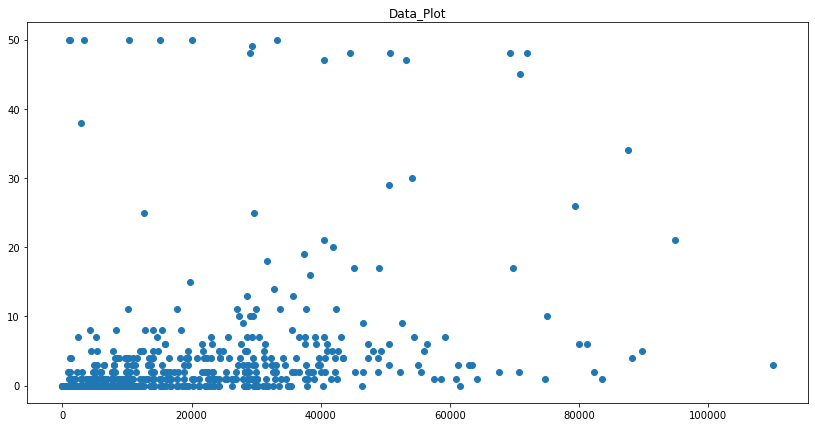

In [68]:
# Set the size of the plot
plt.figure(figsize=(14,7))
plt.scatter(df_final['pop'], df_final['Gym_count'])
plt.title('Data_Plot')

## Clustering all data points by Population vs Gym count using k-Means

In [69]:
df_chicago_KM = df_final[['Gym_count','pop']]
df_chicago_KM = df_chicago_KM.dropna()

In [70]:
df_chicago_KM.head(5)

,Gym_count,pop
0,3.0,110029
1,21.0,94907
2,5.0,89857
3,4.0,88204
4,34.0,87633


In [71]:

km = KMeans(n_clusters=5).fit(df_chicago_KM)

In [73]:
labels = km.predict(df_chicago_KM)
centroids = km.cluster_centers_

In [74]:
labels

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [75]:
centroids

array([[3.03219107e-01, 1.60488370e+03],
       [8.52173913e+00, 4.46318551e+04],
       [2.69662921e+00, 1.27952809e+04],
       [1.21666667e+01, 7.59237500e+04],
       [4.18939394e+00, 2.81247348e+04]])

In [76]:
cluster_map = pd.DataFrame()
cluster_map['zip']=df_chicago_KM.index.values
cluster_map['Cluster']  = km.labels_

In [77]:
cluster_map.head()

,zip,Cluster
0,0,3
1,1,3
2,2,3
3,3,3
4,4,3


In [78]:
df_chicago_map = df_final.join(cluster_map.set_index('zip'))

In [79]:
df_chicago_map.head(5)

,zip,pop,city_x,county,lat,lng,Gym_count,Cluster
0,60629,110029,Chicago,Cook,41.77567,-87.71176,3.0,3
1,60618,94907,Chicago,Cook,41.94700,-87.70244,21.0,3
2,60632,89857,Chicago,Cook,41.81133,-87.71335,5.0,3
3,60639,88204,Chicago,Cook,41.92058,-87.75607,4.0,3
4,60647,87633,Chicago,Cook,41.92065,-87.70175,34.0,3


In [80]:
conditions = [
    (df_chicago_map['Cluster'] == 0.0),
    (df_chicago_map['Cluster'] == 1.0),
    (df_chicago_map['Cluster'] == 2.0),
    (df_chicago_map['Cluster'] == 3.0),
    (df_chicago_map['Cluster'] == 4.0)]
choices = ['yellow', 'blue', 'purple','red','black']
df_chicago_map['color'] = np.select(conditions, choices, default='black')

In [81]:
df_red = df_chicago_map.loc[df_chicago_map['color'] == 'red']
df_yellow = df_chicago_map.loc[df_chicago_map['color'] == 'yellow']
df_blue = df_chicago_map.loc[df_chicago_map['color'] == 'blue']
df_black = df_chicago_map.loc[df_chicago_map['color'] == 'black']
df_purple = df_chicago_map.loc[df_chicago_map['color'] == 'purple']

## Plotting scatter plot for all segment color coded

Text(0.5, 1.0, 'K Mean Classification')

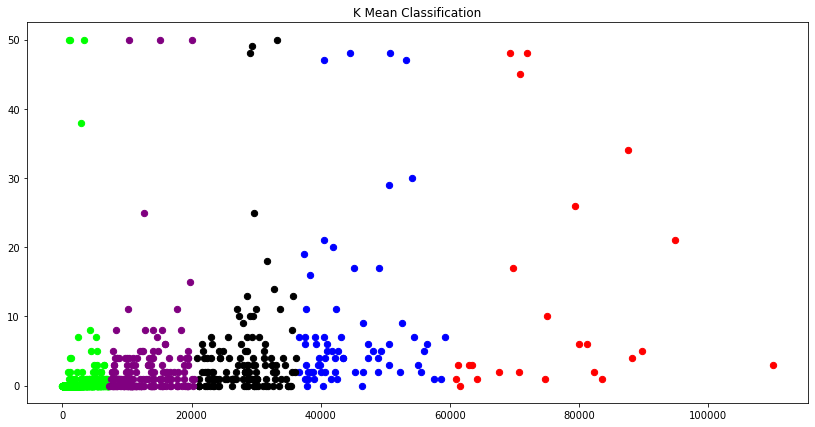

In [85]:
plt.figure(figsize=(14,7))

# Plot the Models Classifications
plt.scatter(df_red['pop'], df_red['Gym_count'], c='red', s=40)
plt.scatter(df_blue['pop'], df_blue['Gym_count'], c='blue', s=40)
plt.scatter(df_yellow['pop'], df_yellow['Gym_count'], c='lime', s=40)
plt.scatter(df_black['pop'], df_black['Gym_count'], c='black', s=40)
plt.scatter(df_purple['pop'], df_purple['Gym_count'], c='purple', s=40)
plt.title('K Mean Classification')

### Final MAP of chicago for points in each segment color coded

In [99]:
df_red.head(5)

,zip,pop,city_x,county,lat,lng,Gym_count,Cluster,color
0,60629,110029,Chicago,Cook,41.77567,-87.71176,3.0,3,red
1,60618,94907,Chicago,Cook,41.94700,-87.70244,21.0,3,red
2,60632,89857,Chicago,Cook,41.81133,-87.71335,5.0,3,red
3,60639,88204,Chicago,Cook,41.92058,-87.75607,4.0,3,red
4,60647,87633,Chicago,Cook,41.92065,-87.70175,34.0,3,red


In [94]:
# create map of toronto using latitude and longitude values
map_chicago = folium.Map(location=[41.87, -87.62], zoom_start=10.5)

# add markers to map
for lat, lng, city_x, county,color in zip(df_red['lat'], df_red['lng'], df_red['city_x'], df_red['county'], df_red['color']):
    label = '{}, {}'.format(lat, lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill=True,
        fill_opacity=.5,
        parse_html=False).add_to(map_chicago)
    
    
for lat, lng, city_x, county,color in zip(df_blue['lat'], df_blue['lng'], df_blue['city_x'], df_blue['county'], df_blue['color']):
    label = '{}, {}'.format(lat, lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill_color='blue',
        fill=True,
        fill_opacity=.5,
        parse_html=False).add_to(map_chicago)
for lat, lng, city_x, county,color in zip(df_black['lat'], df_black['lng'], df_black['city_x'], df_black['county'], df_black['color']):
    label = '{}, {}'.format(lat, lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='black',
        fill_color='black',
        fill=True,
        fill_opacity=.5,
        parse_html=False).add_to(map_chicago)
    
for lat, lng, city_x, county,color in zip(df_yellow['lat'], df_yellow['lng'], df_yellow['city_x'], df_yellow['county'], df_yellow['color']):
    label = '{}, {}'.format(lat, lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='lime',
        fill_color='lime',
        fill=True,
        fill_opacity=.5,
        parse_html=False).add_to(map_chicago)

for lat, lng, city_x, county,color in zip(df_purple['lat'], df_purple['lng'], df_purple['city_x'], df_purple['county'], df_purple['color']):
    label = '{}, {}'.format(lat, lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='purple',
        fill_color='purple',
        fill=True,
        fill_opacity=.5,
        parse_html=False).add_to(map_chicago)
    


In [95]:
map_chicago